## Midterm

#### Emily Yamauchi

#### Exercise 1. 

In this exercise, you will implement in **Python** a first version of your own $\ell_2^2$-regularized binary logistic regression with $\rho$-logistic loss. You will write your own code for all functions: accelerated gradient algorithm, backtracking line search, $\ell_2^2$-regularized binary logistic regression with $\rho$-logistic loss, 10x2 validation.  

The $\ell_2^2$-regularized binary logistic regression with $\rho$-logistic loss is a supervised binary classification method, similar to $\ell_2^2$-regularized binary logistic regrssion:  

$$
\begin{align}
\min_{\beta\in\mathbb{R}^d}F(\beta):=\frac{1}{n}\sum_{i=1}^n\frac{1}{\rho}\log(1+\exp(-\rho y_ix_i^\top\beta)) + \lambda||\beta||_2^2
\end{align}
$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
def objective_func(beta, lamb, rho, X, y):
    """
    Compute the objective function
    """
    
    n = X.shape[0]
    f1 = np.sum((1/rho)*np.log(1 + np.exp(-rho*y*X.dot(beta))))
    f2 = lamb*np.linalg.norm(beta)**2
    
    return f1/n + f2

(a) Compute the gradient $\nabla F(\beta)$ of $F$. 

$$
\begin{align}
F(\beta)&=\frac{1}{n}\sum_{i=1}^n\frac{1}{\rho}\log(1+\exp(-\rho y_ix_i^\top\beta))+\lambda\beta^\top\beta \\
\nabla F(\beta)&=\frac{1}{n}\sum_{i=1}^n\nabla\frac{1}{\rho}\log(1+\exp(-\rho y_ix_i^\top\beta))+\lambda\nabla \beta^\top I\beta \\
&=-\frac{1}{n}\sum_{i=1}^ny_ix_i^\top\frac{\exp(-\rho y_ix_i^\top\beta)}{1+\exp(-\rho y_ix_i^\top\beta)}+2\lambda\beta
\end{align}
$$

In [3]:
def compute_grad(beta, lamb, rho, X, y):
    """
    Compute the gradient of function F
    """
    
    n = X.shape[0]
    exp = np.exp((X.T*y).T.dot(beta) * -rho)
    Q = np.diag(exp/(1+exp))
    
    f1 = -np.dot(X.T, np.dot(Q, y))/n
    f2 = 2*lamb*beta
    
    return f1 + f2

(b) Consider the `Algerian forest fire` dataset from the UCI Machine Learning Repository.  

Clean and preprocess the data, including the following steps:  

- Remove the `day`, `month`, `year` columns.
- Handle `NA` values.
- Let the features $X$ include all remaining columns *other than* `Classes`.
- Convert the labels in `Classes`to $+1$ for "fire" and $-1$ for "not fire". Report and handle any cases not falling into these categories. 
- Perform an 80/20 train-test split of the data. 
- Standardize the features.

In [4]:
fire_df = pd.read_csv('data/Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)

In [5]:
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
fire_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,10,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
fire_df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
# Remove day, month, year; handle NAs

df = fire_df.drop(columns = ['day', 'month', 'year']).dropna()

# only 2 NA vs 245 rows, so feel safe to drop

df = df.rename(columns = lambda x: x.strip())

In [9]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [10]:
df['Classes'] = df['Classes'].str.strip()

df.loc[df['Classes'] == 'Classes']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [11]:
# duplicate column name row, just drop

df = df.drop(df.loc[df['Classes'] == 'Classes'].index)

In [12]:
df_bin = [1 if x == 'fire' else -1 if x == 'not fire' else x for x in df['Classes']]

In [13]:
df_cols = df.columns

df_features = df[df_cols[:-1]].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
X = np.array(df_features)
y = np.array(df_bin)

print('X.shape: ',X.shape)
print('y.shape: ',y.shape)

X.shape:  (243, 10)
y.shape:  (243,)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [17]:
Xs = np.array((X_train - X_train.mean())/X_train.std())

(c) Write a function *myrhologistic* that implements the fast gradient algorithm to train the $\ell_2^2$ regularized binary logistic regression with $\rho-$logistic loss. The function takes as input the initial step-size for the backtracking rule, the $\epsilon$ for the stopping criterion based on the norm of the gradient of the objective, and the value of $\rho$. The code in this part should include the following components, all implemented by hand:  

- The $\rho-$logistic function
- The gradient of the $\rho-$logistic loss function
- Backtracking line search
- Fast gradient descent

In [18]:
def rhologisticloss(beta, lamb, rho, X, y):
    
    n = X.shape[0]
    f1 = np.sum((1/rho)*np.log(1 + np.exp(-rho*y*X.dot(beta))))
    f2 = lamb*np.linalg.norm(beta)**2
    
    return f1/n + f2


def rhologisticgrad(beta, lamb, rho, X, y):
    
    n = X.shape[0]
    exp = np.exp((X.T*y).T.dot(beta) * -rho)
    Q = np.diag(exp/(1+exp))
    
    f1 = -np.dot(X.T, np.dot(Q, y))/n
    f2 = 2*lamb*beta
    
    return f1 + f2

In [19]:
def backtracking(beta, lamb, rho, eta_init, decay_rate, prop_constant, X, y):
    
    eta = eta_init
    
    def f(beta):
        return objective_func(beta, lamb, rho, X, y)
    
    def f_grad(beta):
        return compute_grad(beta, lamb, rho, X, y)
    
    def sufficient_decrease(eta):
        p = -f_grad(beta)
        lhs = f(beta + eta * p) - f(beta)
        rhs = prop_constant * eta * np.dot(f_grad(beta), p)
        return lhs <= rhs
    
    while not sufficient_decrease(eta):
        eta *= decay_rate
    
    return eta

In [20]:
def fastgradalgo(beta_init, theta_init, lamb, rho, eta_init, X, y, epsilon):
    
    eta = eta_init
    beta_t = beta_init
    theta_t = theta_init
    betas = [beta_t]
    t = 0
    
    def f(beta):
        return objective_func(beta, lamb, rho, X, y)
    
    def f_grad(beta):
        return compute_grad(beta, lamb, rho, X, y)
    
    def f_norm(beta):
        return np.linalg.norm(f_grad(beta))
    
    while not f_norm(beta_t) <= epsilon:
        
        beta_1 = theta_t - eta * f_grad(theta_t)
        theta_t = beta_1 + (t/(t+3)) * (beta_1 - beta_t)
        betas.append(beta_1)
        eta = backtracking(beta_t, lamb, rho, eta, 0.8, 0.5, X, y)
        beta_t = beta_1
        t += 1
    
    return betas

In [21]:
def myrhologistic(X, y, lamb, rho, eta_init, epsilon):
    
    beta_init = np.zeros(X.shape[1])
    theta_init = np.zeros(X.shape[1])
    betas = fastgradalgo(beta_init, theta_init, lamb, rho, eta_init, X, y, epsilon)
    
    return betas[-1]

(d) Train your $\ell_2^2$-regularized binary logistic regression with $\rho$-logistic loss with $\rho=2$ and $\epsilon=1\times10^{-3}$ on the `Algerian forest fire` training data, setting $\lambda=1$. Report your misclassification error for this value of $\lambda$.

In [22]:
rho = 2
epsilon = 10**-3
lamb = 1
eta_init = 0.1

In [23]:
beta_calc = myrhologistic(Xs, y_train, lamb, rho, eta_init, epsilon)

In [24]:
def get_y_pred(beta, X):
    """
    Return the predicted value of y given beta and X
    """
    
    pred = np.exp(np.dot(X, beta))/(1+np.exp(np.dot(X, beta)))
    y_pred = [1 if y > 0.5 else -1 for y in list(pred)]
    
    return np.array(y_pred)


def get_misclassification(beta, X, y):
    """
    Return misclassification rate (100% - correct%) given the true y and predicted value derived from beta and X
    """
    
    y_pred = get_y_pred(beta, X)
    
    return 1 - np.mean(y == y_pred)

In [25]:
get_misclassification(beta_calc, X_test, y_test)

0.40816326530612246

(e) Write a function *tenbytwoval* that implements $10\times2$ validation. $10\times2$ validation is defined similarly to $5\times2$ validation, which we have seen in the labs and lecture, but with 10 random splits of the training data.  

Your *tenbytwoval* function should use the code you've written above, along with hand-implemented helper functions to:  

- Compute label predictions given training data and a parameter vector $\beta$
- Compute the prediction accuracy, given the label predictions and the true labels

In [26]:
def tenbytwoval(X, y, lambs):
    """
    Perform a ten-by-two validation
    For each value of your hyperparameter, repeat the following procedure 10 times:
    -Shuffle the indices of the training data.
    -Split the training data evenly into two parts. Call these the "train" and "validation" sets.
    -Train the model using data from the "train" set.
    -Generate model predictions for the "validation" set and record the prediction accuracy.
    -Swap the role of the "train" and "validation" sets and repeat the training and prediction steps above.
    Select the hyperparameter value with the best average prediction accuracy over all 20 trials.
    """
        
    eta_init = 0.1
    rho = 2
    epsilon = 10**-3
    n = X.shape[0]
    lamb_acc = np.zeros((20, len(lambs)))
    
    for j in range(len(lambs)):
        
        for i in range(10):
            #shuffle index
            ix = np.random.choice(n, size=n, replace = False)
            X_shuffle = X[ix]
            y_shuffle = y[ix]
            
            #split training/validation data
            X_train = np.split(X_shuffle, 2)[0]
            X_val = np.split(X_shuffle, 2)[1]
            y_train = np.split(y_shuffle, 2)[0]
            y_val = np.split(y_shuffle, 2)[1]
            
            #train model
            beta = myrhologistic(X_train, y_train, lambs[j], rho, eta_init, epsilon)
            
            #predict on validation, get accuracy
            lamb_acc[2*i, j] = get_misclassification(beta, X_val, y_val)
            
            #swap
            beta_swap = myrhologistic(X_val, y_val, lambs[j], rho, eta_init, epsilon)
            lamb_acc[2*i+1, j] = get_misclassification(beta_swap, X_train, y_train)
    
    return lamb_acc

(f) Find the optimal value of $\lambda$ using $10\times2$ validation. Fit the model to the training data using the $\rho-$logistic loss, using this value of $\lambda$, and again with $\rho=2, \epsilon=1\times10^{-3}$. Plot the value of the objective function versus the iteration number Plot the misclassification error on the train and test sets as a function of the iteration number. Report the final misclassification error on the test set.

In [27]:
lambs = np.logspace(-2, 4, 20)
lambs_results = tenbytwoval(Xs, y_train, lambs)
best_lamb = lambs[np.argmin(lambs_results.mean(axis=0))]

print('best_lamb: ', best_lamb)

best_lamb:  0.01


In [28]:
import matplotlib.pyplot as plt

In [29]:
beta_init = np.zeros(Xs.shape[1])
theta_init = np.zeros(Xs.shape[1])
betas = fastgradalgo(beta_init, theta_init, best_lamb, rho, eta_init, Xs, y_train, epsilon)

In [30]:
obj_values = [objective_func(b, best_lamb, rho, Xs, y_train) for b in betas]

Text(0, 0.5, 'Objective Value')

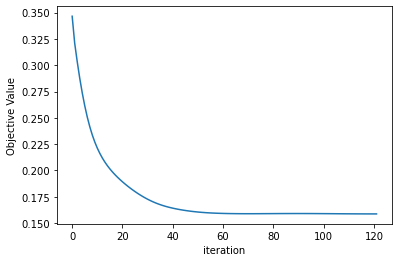

In [31]:
plt.plot(obj_values)
plt.xlabel('iteration')
plt.ylabel('Objective Value')

In [32]:
misclass_values = [get_misclassification(b, X_test, y_test) for b in betas]

Text(0, 0.5, 'Misclassification Value')

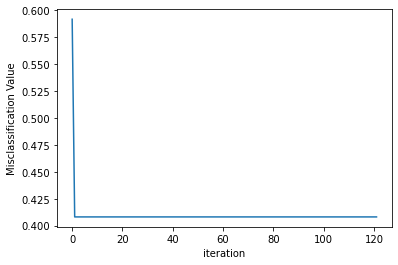

In [33]:
plt.plot(misclass_values)
plt.xlabel('iteration')
plt.ylabel('Misclassification Value')

In [34]:
print('Final misclassification value: ', misclass_values[-1])

Final misclassification value:  0.40816326530612246
